In [1]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.4 MB/s eta 0:00:00


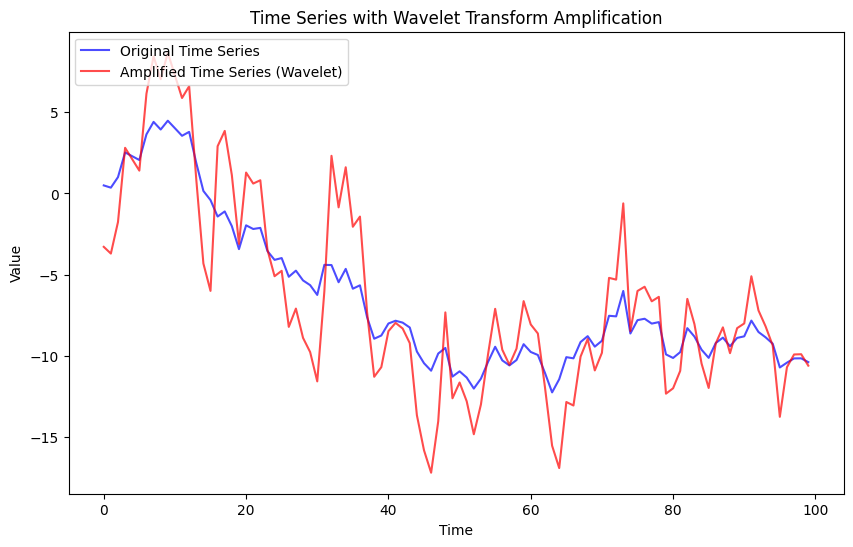

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

# Example: Create a synthetic time series (random walk)
np.random.seed(42)
time_series = np.cumsum(np.random.randn(100))

# Convert to pandas Series
df = pd.Series(time_series)

# Step 1: Apply Wavelet Transform (using Haar wavelet, or you can choose another type)
coeffs = pywt.wavedec(df, 'haar', level=4)  # Decomposition into 4 levels

# Step 2: Amplify high-frequency components (detail coefficients)
# Amplify the last (smallest-scale) detail coefficients (high-frequency changes)
coeffs[1:] = [c * 3 for c in coeffs[1:]]  # Amplify the detail coefficients (level 1-4)

# Step 3: Reconstruct the time series with the amplified coefficients
amplified_time_series_wavelet = pywt.waverec(coeffs, 'haar')

# Plotting the original and amplified time series
plt.figure(figsize=(10,6))
plt.plot(df, label='Original Time Series', color='blue', alpha=0.7)
plt.plot(amplified_time_series_wavelet, label='Amplified Time Series (Wavelet)', color='red', alpha=0.7)
plt.legend(loc='upper left')
plt.title('Time Series with Wavelet Transform Amplification')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


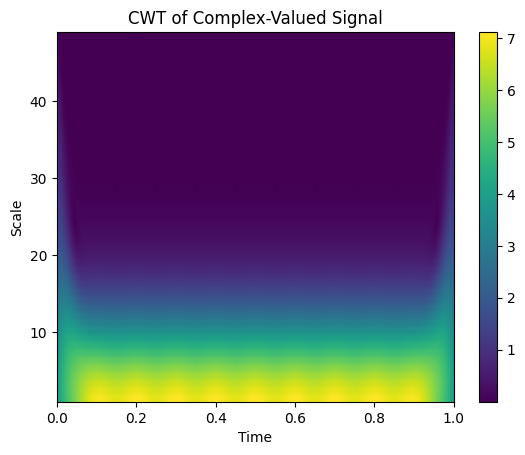

In [3]:
# import pywt
# import numpy as np

# Create a complex-valued signal
t = np.linspace(0, 1, 1000)
signal = np.exp(1j * 2 * np.pi * 10 * t) + np.exp(1j * 2 * np.pi * 20 * t)

# Perform the CWT
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
scales = np.arange(1, 50)
coefs, freqs = pywt.cwt(signal, scales, wavelet)

# Visualize the results
import matplotlib.pyplot as plt

plt.imshow(np.abs(coefs), extent=[t[0], t[-1], scales[0], scales[-1]], aspect='auto', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.title('CWT of Complex-Valued Signal')
plt.colorbar()
plt.show()